In [107]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import connect_to_db as cn

In [94]:
# cdf plotting을 하기 위한 function.
def draw_cdf(np_result, n_bins, label, title, color):
    np_result = np.array(np_result, dtype=float)
    filename = title + '.png'

    plt.rcParams["figure.figsize"] = [15, 10]
    plt.rcParams["figure.autolayout"] = True

    count, bins_count = np.histogram(np_result, bins=n_bins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF", color=color)
    plt.xlabel(label, fontsize=12)
    plt.title(title, fontsize=18)
    plt.xscale('symlog')
    plt.savefig(filename, dpi=300)
    plt.show()

In [177]:
def draw_cdf2(np_result_list):
    for np_result in np_result_list:
        ser = pd.Series(np_result)
        ser.hist(cumulative=True, density=1, bins=100, histtype='step')
    
    plt.show()

In [166]:
def draw_cdf3(np_result_list):
    fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 설정
    ax = fig.add_subplot()
    
    for np_result in np_result_list:
        sorted_data = np.sort(np_result)
        plt.step(sorted_data, np.arange(sorted_data.size))

    plt.show()

In [175]:
# cdf plotting을 하기 위한 function.
def draw_cdf4(np_result_list, n_bins, label, title, colors):
    for np_result, color in zip(np_result_list, colors):
        np_result = np.array(np_result, dtype=float)
        
        plt.rcParams["figure.figsize"] = [15, 10]
        plt.rcParams["figure.autolayout"] = True

        count, bins_count = np.histogram(np_result, bins=n_bins)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        plt.plot(bins_count[1:], cdf, label="CDF", color=color)
        plt.xlabel(label, fontsize=12)
        plt.title(title, fontsize=18)
        plt.xscale('symlog')

    plt.show()

In [77]:
def select_query_result_to_df(sql):
    connection = cn.make_connection('connection.csv')
    cursor = connection.cursor(pymysql.cursors.DictCursor)
    cursor.execute(sql)
    result = cursor.fetchall()
    connection.close()
    
    result_df = pd.DataFrame(result)
    
    return result_df

In [96]:
sql = 'select * from mentor where is_valid = 1;'
result_df = select_query_result_to_df(sql)
result_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,1.21432478,0E-8
1,______________Blank,2,1,2.00000,1.50000,0.15693655,-2.00000000,1,0E-8,0.63092975,0E-8,1.32236774
2,_________-----------,4,1,2.00000,1.00000,0.14682996,-2.00000000,1,0.63092975,0E-8,1.32236774,0E-8
3,_________ez_________,1,1,1.00000,2.00000,None,None,1,0E-8,0E-8,0E-8,0E-8
4,_______Anon______,1,1,1.00000,2.00000,None,None,1,0E-8,0E-8,0E-8,0E-8
...,...,...,...,...,...,...,...,...,...,...,...,...
594992,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,0.57938016,1.00000000,1.21432478,2.09590327
594993,zzzzzzarah,1,1,1.00000,3.00000,None,None,1,0E-8,0E-8,0E-8,0E-8
594994,zzzzzzz____,3,3,1.00000,2.00000,0.21963021,0E-8,1,0E-8,0E-8,0E-8,0E-8
594995,zzzzzzzzzra,1,1,1.00000,3.00000,None,None,1,0E-8,0E-8,0E-8,0E-8


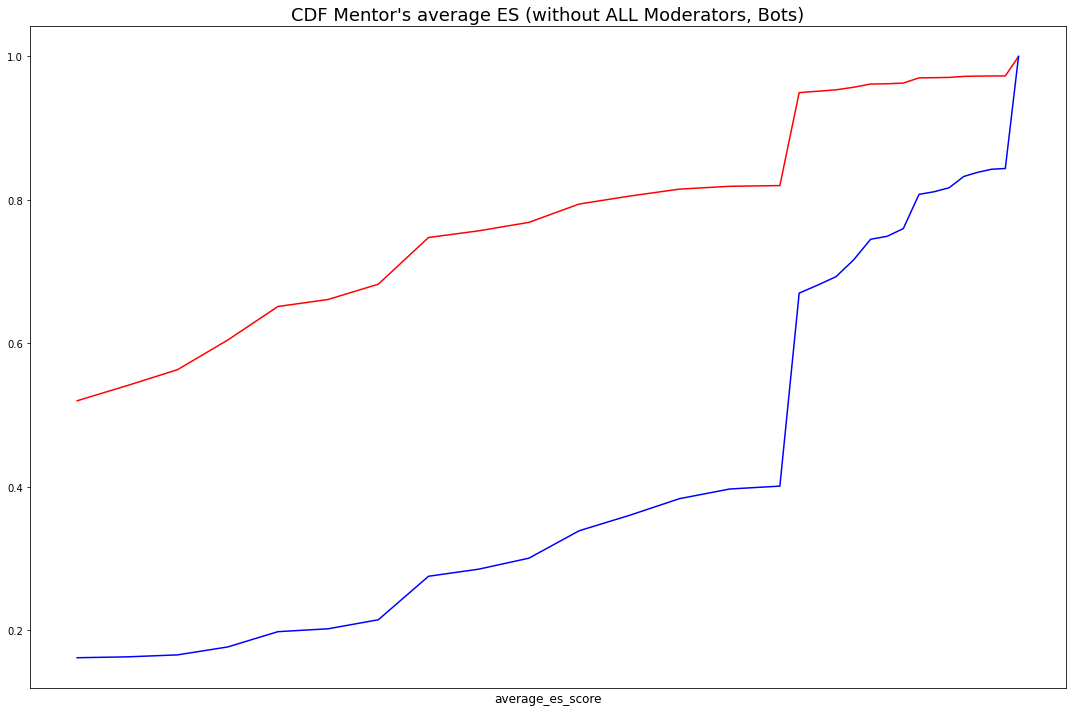

In [176]:
np_result_list = []
np_result_list.append(np.array(result_df['average_is_score'].tolist()))
np_result_list.append(np.array(result_df['average_es_score'].tolist()))
colors = ['red', 'blue']
draw_cdf4(np_result_list, 30, 'average_es_score', "CDF Mentor's average ES (without ALL Moderators, Bots)", colors)

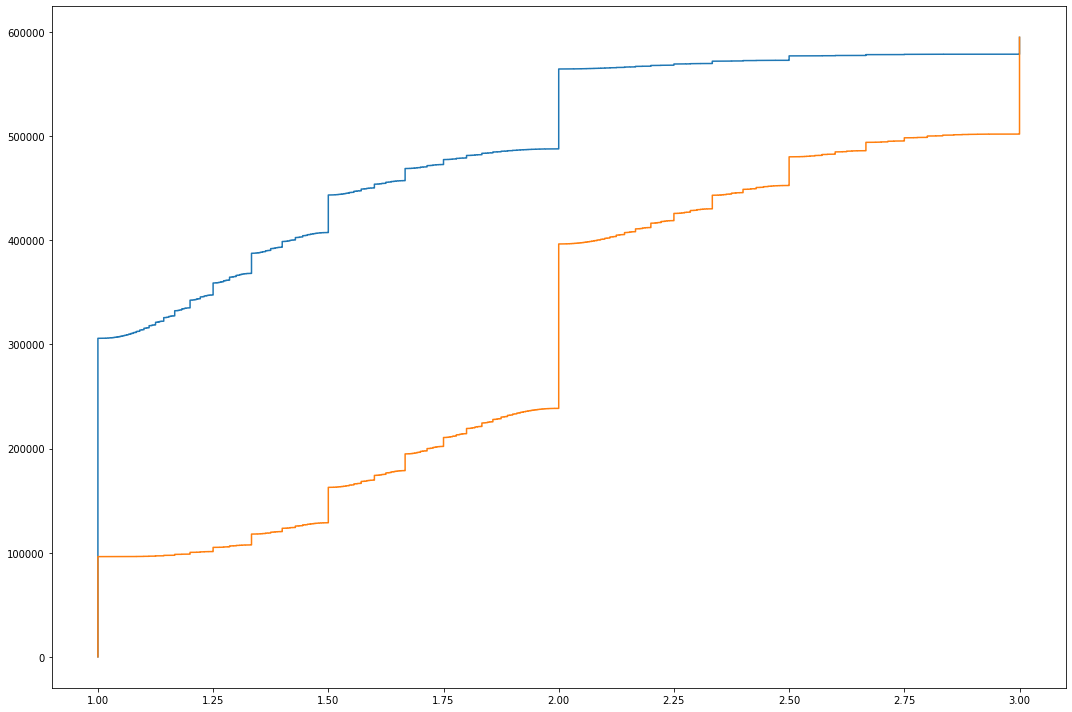

In [172]:
np_result_list = []
np_result_list.append(np.array(result_df['average_is_score'].tolist()))
np_result_list.append(np.array(result_df['average_es_score'].tolist()))
draw_cdf3(np_result_list)

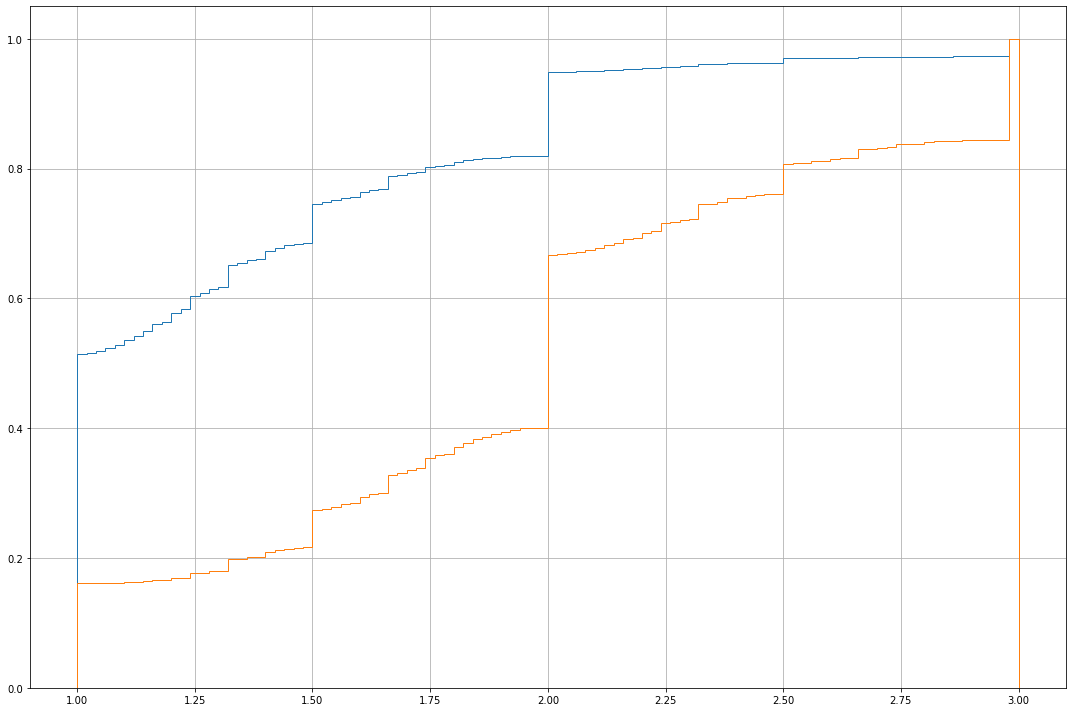

In [178]:
np_result_list = []
np_result_list.append(np.array(result_df['average_is_score'].tolist()))
np_result_list.append(np.array(result_df['average_es_score'].tolist()))
draw_cdf2(np_result_list)

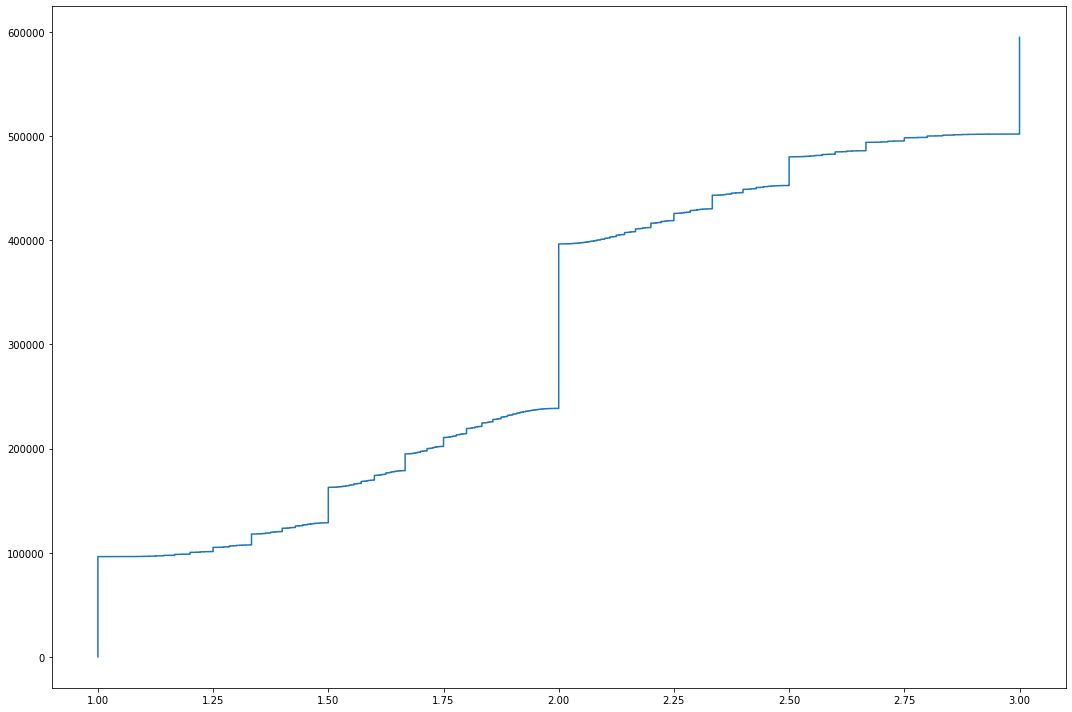

In [128]:
np_result2 = np.array(result_df['average_es_score'].tolist())
draw_cdf3(np_result2)

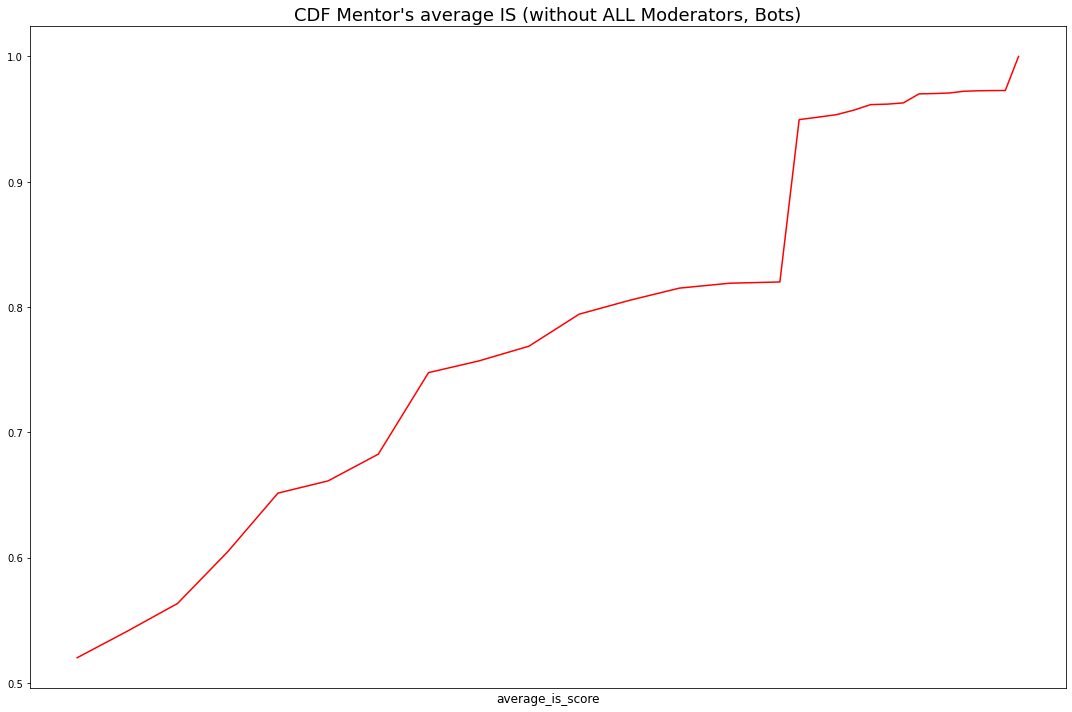

In [83]:
np_result1 = np.array(result_df['average_is_score'].tolist())
draw_cdf(np_result1, 30, 'average_is_score', "CDF Mentor's average IS (without ALL Moderators, Bots)", 'red')

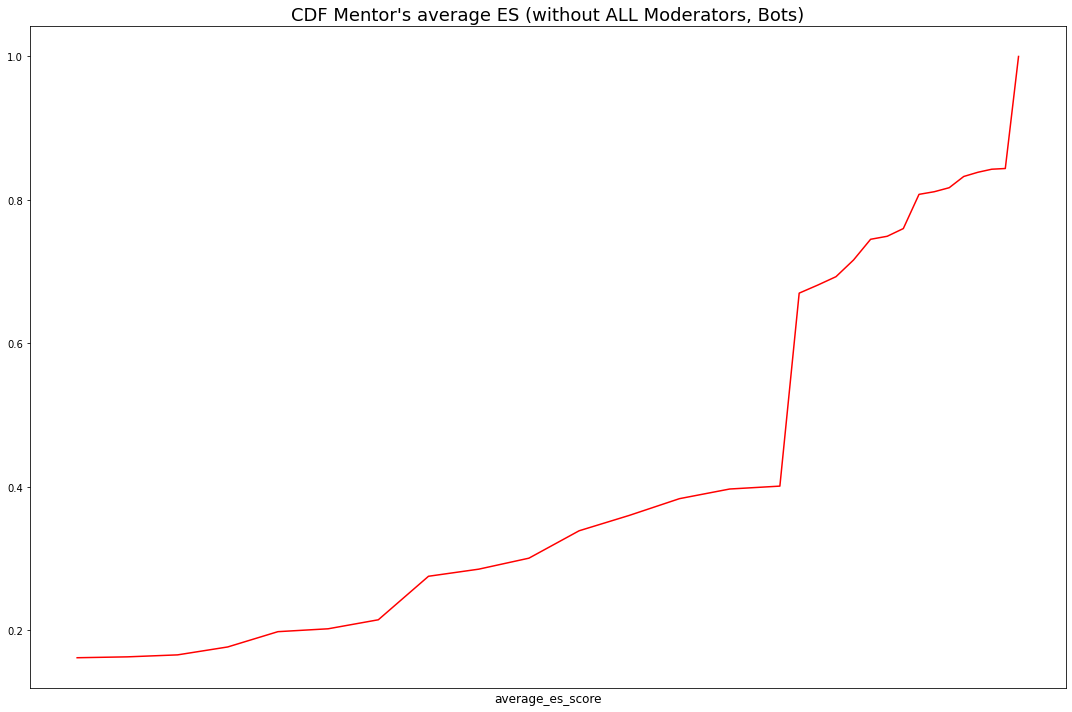

In [80]:
np_result2 = np.array(result_df['average_es_score'].tolist())
draw_cdf(np_result2, 30, 'average_es_score', "CDF Mentor's average ES (without ALL Moderators, Bots)", 'red')

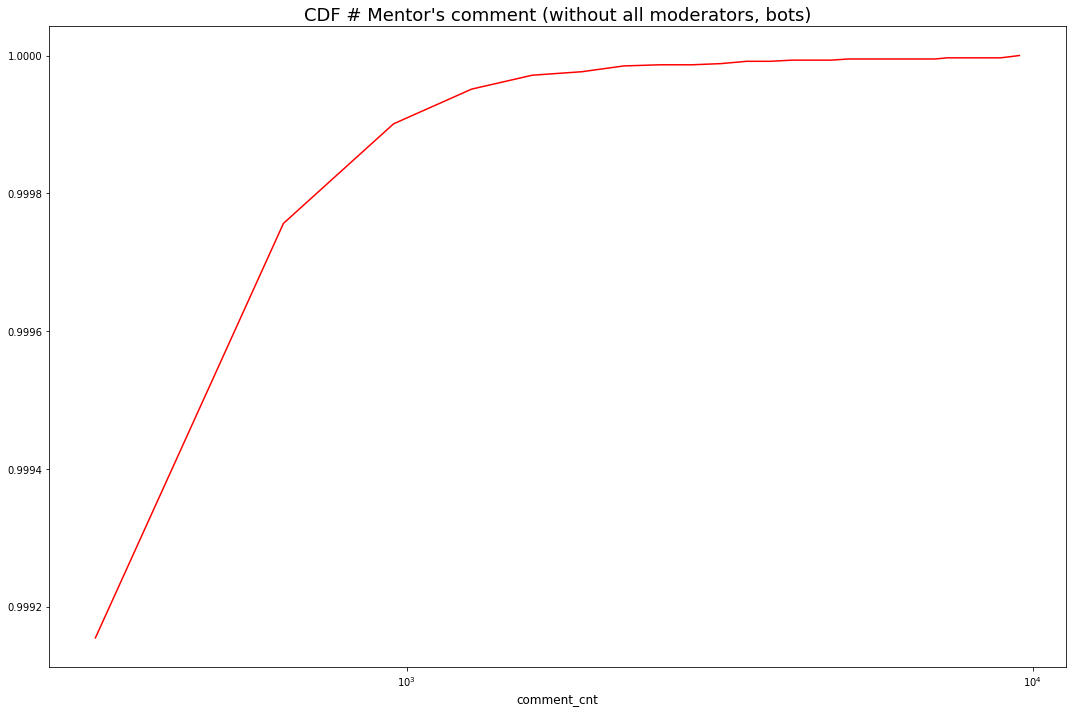

In [81]:
np_result3 = np.array(result_df['comment_cnt'].tolist())
draw_cdf(np_result3, 30, 'comment_cnt', "CDF # Mentor\'s comment (without all moderators, bots)", 'red')

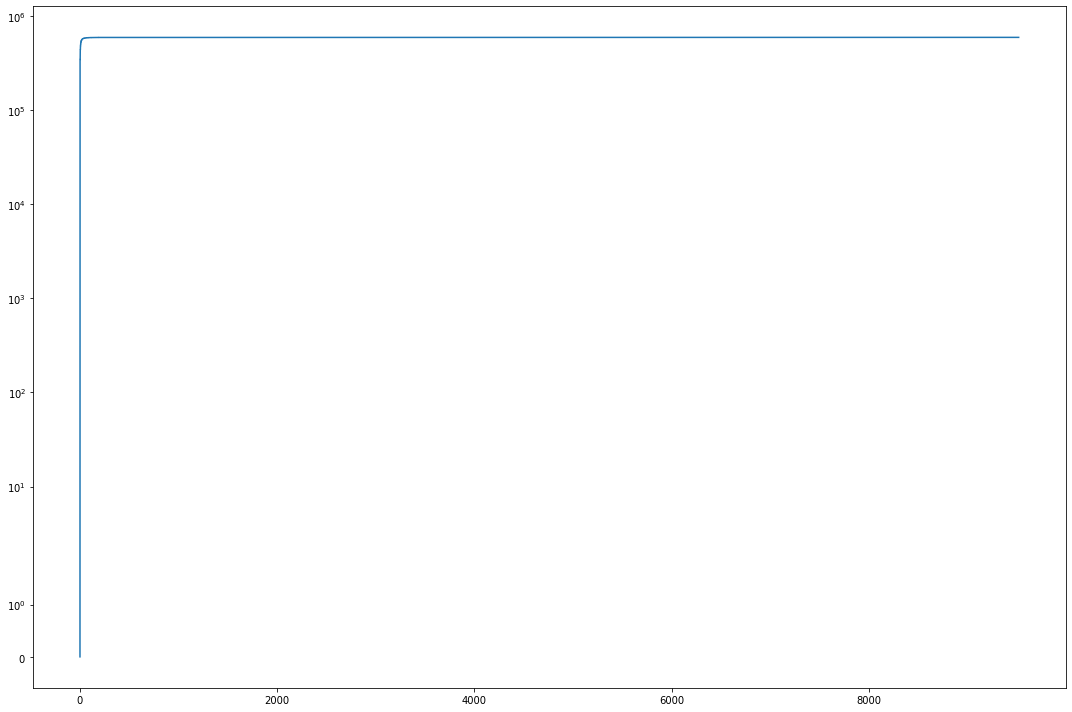

In [139]:
np_result3 = np.array(result_df['comment_cnt'].tolist())
draw_cdf3(np_result3)

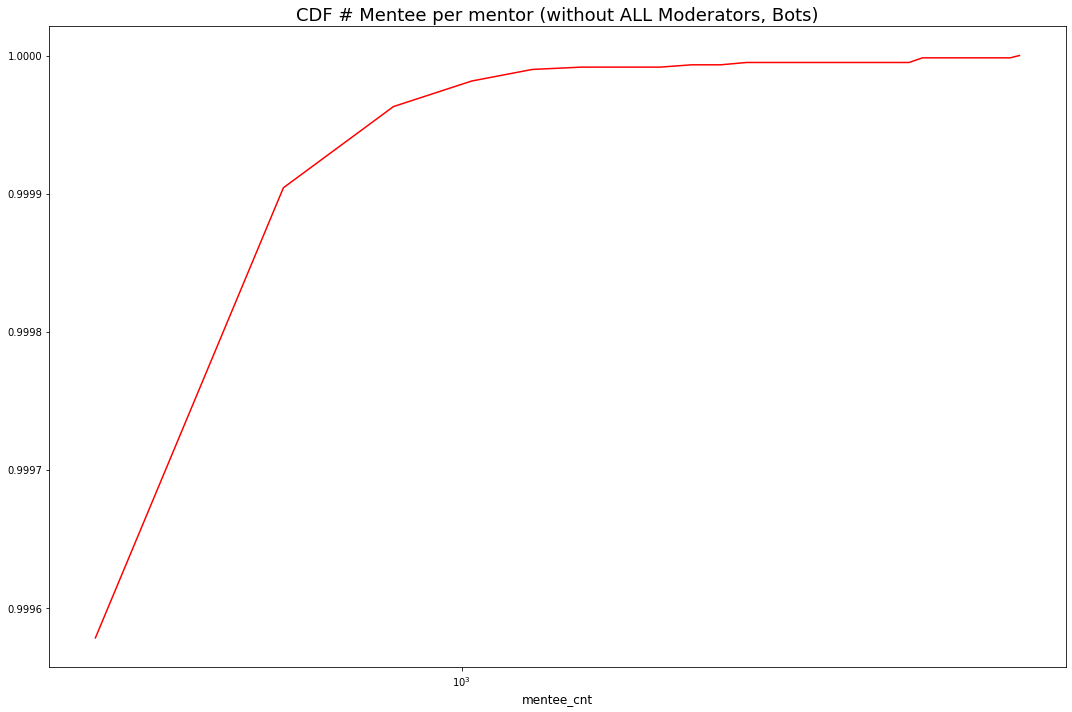

In [82]:
np_result4 = np.array(result_df['mentee_cnt'].tolist())
draw_cdf(np_result4, 30, 'mentee_cnt', "CDF # Mentee per mentor (without ALL Moderators, Bots)", 'red')

In [84]:
sql2 = 'select * from mentor where is_valid = 1 and comments_similarity >= 0;'
result_df2 = select_query_result_to_df(sql2)
result_df2

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,1.21432478,0E-8
1,______________Blank,2,1,2.00000,1.50000,0.15693655,-2.00000000,1,0E-8,0.63092975,0E-8,1.32236774
2,_________-----------,4,1,2.00000,1.00000,0.14682996,-2.00000000,1,0.63092975,0E-8,1.32236774,0E-8
3,_______woohoo,4,2,1.00000,2.00000,0.02432665,0.05403434,1,0E-8,0.94639463,0E-8,1.98355160
4,_______ZERO,10,10,1.10000,2.20000,0.09195855,0.05160771,1,0.29590327,0.81734542,0.62018464,1.71307695
...,...,...,...,...,...,...,...,...,...,...,...,...
348329,ZzzZura,2,1,1.00000,1.50000,0.12417232,0E-8,1,0E-8,0.63092975,0E-8,1.32236774
348330,Zzzzz315,2,2,1.00000,2.50000,0.18895569,0E-8,1,0E-8,0.63092975,0E-8,1.32236774
348331,zzzzzima,2,2,2.00000,2.00000,0.13160075,0E-8,1,0.57938016,0.57938016,1.21432478,1.21432478
348332,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,0.57938016,1.00000000,1.21432478,2.09590327


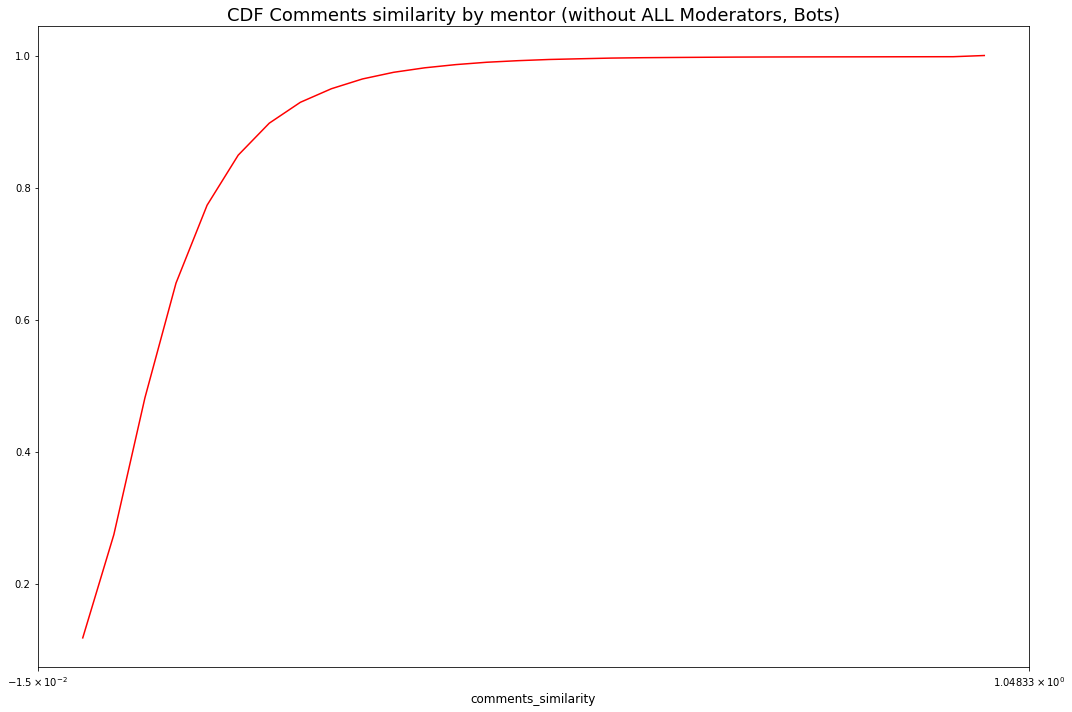

In [85]:
np_result5 = np.array(result_df2['comments_similarity'].tolist())
draw_cdf(np_result5, 30, 'comments_similarity', "CDF Comments similarity by mentor (without ALL Moderators, Bots)", 'red')

In [86]:
sql3 = 'select * from mentor where is_valid = 1 and posts_similarity >= 0;'
result_df3 = select_query_result_to_df(sql3)
result_df3

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,1.21432478,0E-8
1,_______woohoo,4,2,1.00000,2.00000,0.02432665,0.05403434,1,0E-8,0.94639463,0E-8,1.98355160
2,_______ZERO,10,10,1.10000,2.20000,0.09195855,0.05160771,1,0.29590327,0.81734542,0.62018464,1.71307695
3,______V______,10,9,1.20000,2.30000,0.08272898,0.03894385,1,0.45548592,0.93723056,0.95465442,1.96434461
4,_____0_,2,2,1.00000,2.50000,0.07903821,0.03580134,1,0E-8,0.63092975,0E-8,1.32236774
...,...,...,...,...,...,...,...,...,...,...,...,...
281613,ZzzZura,2,1,1.00000,1.50000,0.12417232,0E-8,1,0E-8,0.63092975,0E-8,1.32236774
281614,Zzzzz315,2,2,1.00000,2.50000,0.18895569,0E-8,1,0E-8,0.63092975,0E-8,1.32236774
281615,zzzzzima,2,2,2.00000,2.00000,0.13160075,0E-8,1,0.57938016,0.57938016,1.21432478,1.21432478
281616,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,0.57938016,1.00000000,1.21432478,2.09590327


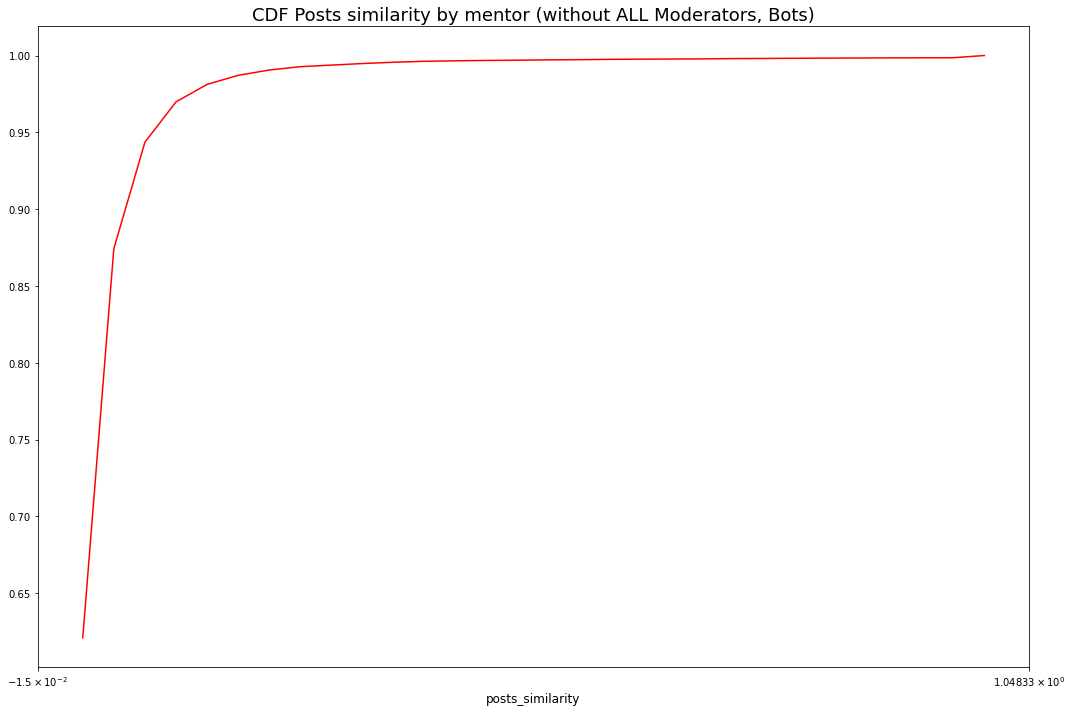

In [87]:
np_result6 = np.array(result_df3['posts_similarity'].tolist())
draw_cdf(np_result6, 30, 'posts_similarity', "CDF Posts similarity by mentor (without ALL Moderators, Bots)", 'red')

In [88]:
sql4 = 'select * from mentor where is_valid = 1 and is_score_entropy is not null;'
result_df4 = select_query_result_to_df(sql4)
result_df4

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,1.21432478,0E-8
1,______________Blank,2,1,2.00000,1.50000,0.15693655,-2.00000000,1,0E-8,0.63092975,0E-8,1.32236774
2,_________-----------,4,1,2.00000,1.00000,0.14682996,-2.00000000,1,0.63092975,0E-8,1.32236774,0E-8
3,_________ez_________,1,1,1.00000,2.00000,None,None,1,0E-8,0E-8,0E-8,0E-8
4,_______Anon______,1,1,1.00000,2.00000,None,None,1,0E-8,0E-8,0E-8,0E-8
...,...,...,...,...,...,...,...,...,...,...,...,...
594992,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,0.57938016,1.00000000,1.21432478,2.09590327
594993,zzzzzzarah,1,1,1.00000,3.00000,None,None,1,0E-8,0E-8,0E-8,0E-8
594994,zzzzzzz____,3,3,1.00000,2.00000,0.21963021,0E-8,1,0E-8,0E-8,0E-8,0E-8
594995,zzzzzzzzzra,1,1,1.00000,3.00000,None,None,1,0E-8,0E-8,0E-8,0E-8


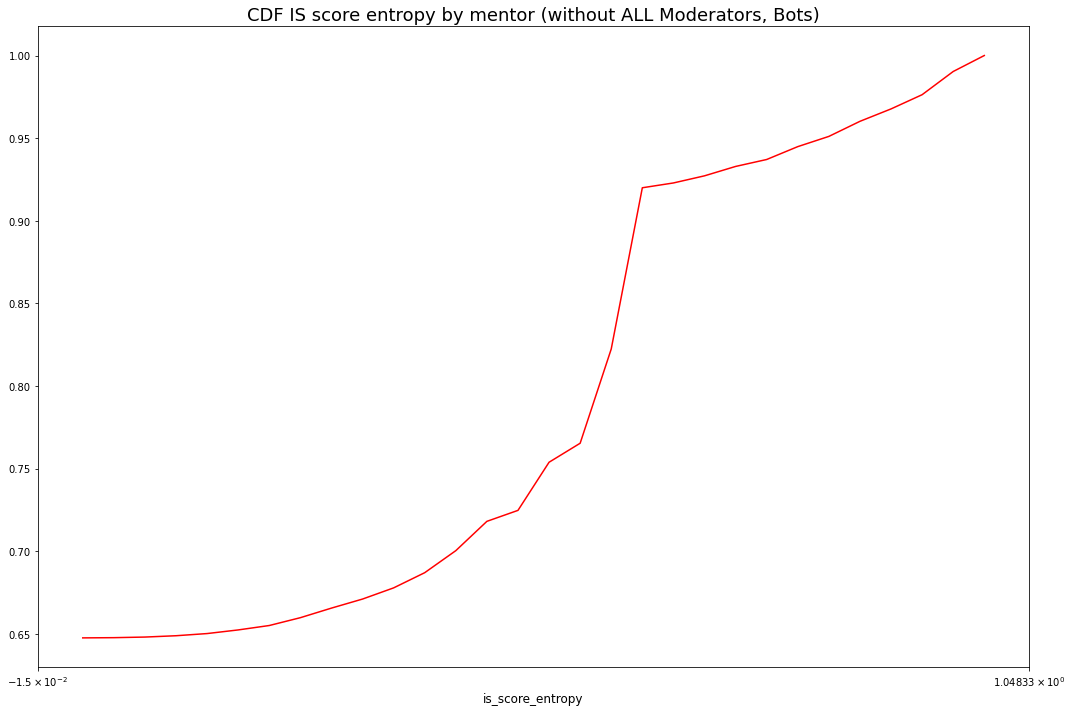

In [89]:
np_result7 = np.array(result_df4['is_score_entropy'].tolist())
draw_cdf(np_result7, 30, 'is_score_entropy', "CDF IS score entropy by mentor (without ALL Moderators, Bots)", 'red')

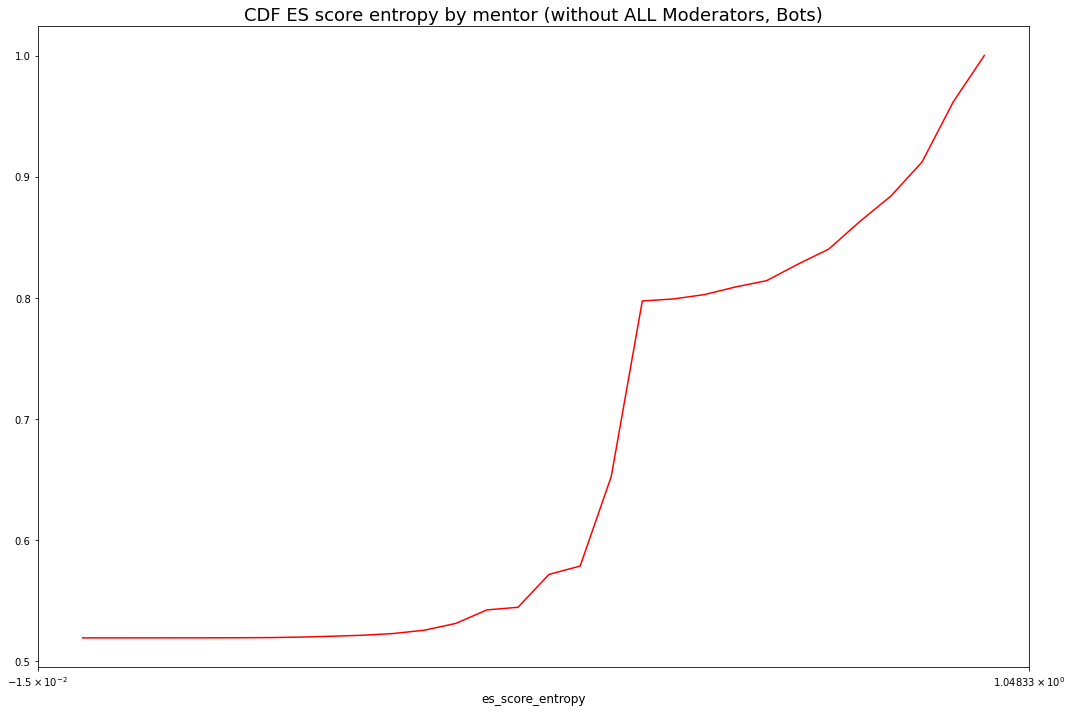

In [90]:
np_result8 = np.array(result_df4['es_score_entropy'].tolist())
draw_cdf(np_result8, 30, 'es_score_entropy', "CDF ES score entropy by mentor (without ALL Moderators, Bots)", 'red')

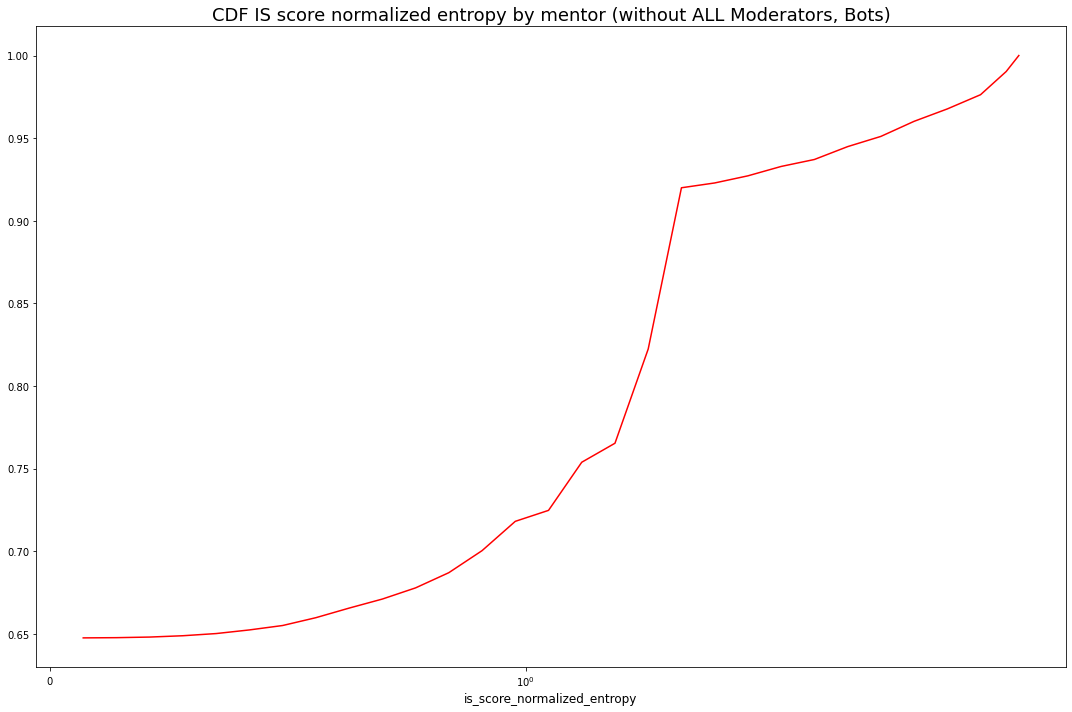

In [91]:
np_result9 = np.array(result_df4['is_score_normalized_entropy'].tolist())
draw_cdf(np_result9, 30, 'is_score_normalized_entropy', "CDF IS score normalized entropy by mentor (without ALL Moderators, Bots)", 'red')

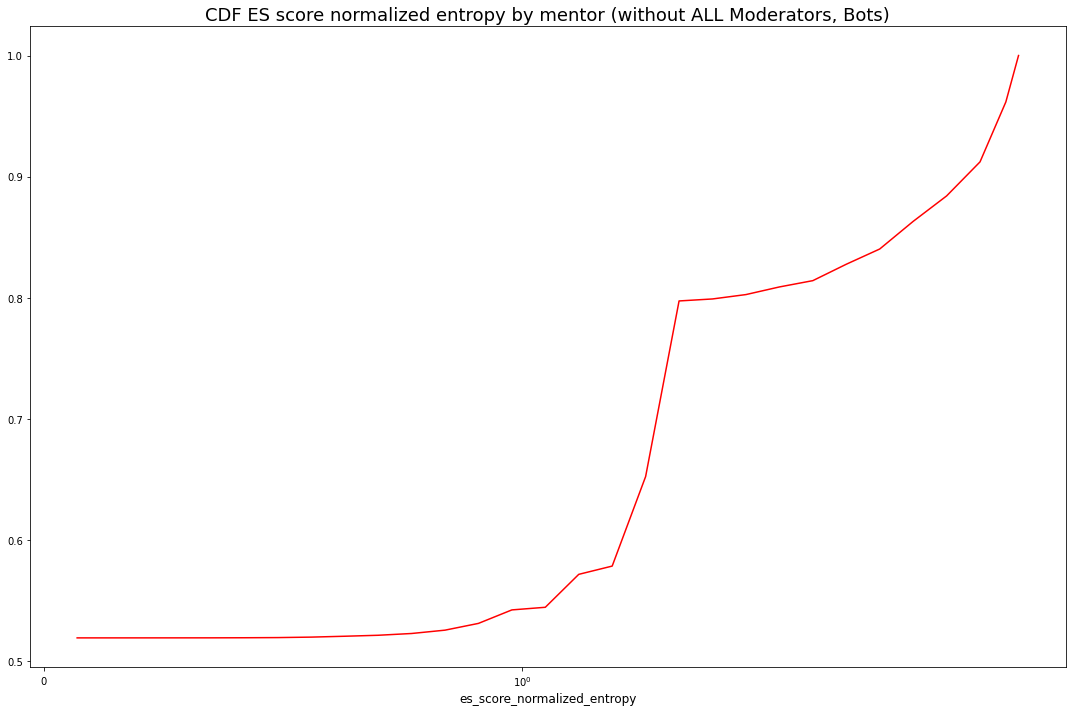

In [92]:
np_result10 = np.array(result_df4['es_score_normalized_entropy'].tolist())
draw_cdf(np_result10, 30, 'es_score_normalized_entropy', "CDF ES score normalized entropy by mentor (without ALL Moderators, Bots)", 'red')

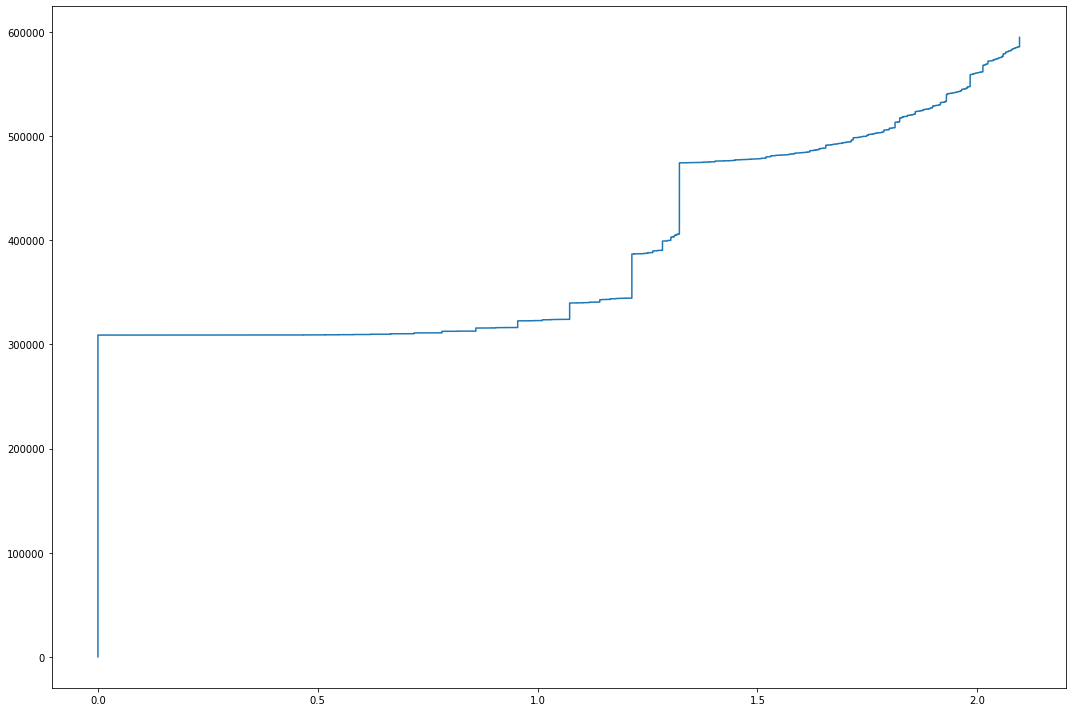

In [143]:
np_result10 = np.array(result_df4['es_score_normalized_entropy'].tolist())
draw_cdf3(np_result10)